In [14]:
import pandas as pd
import numpy as np
import datetime as dt

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error

In [271]:
# read data
train_df = pd.read_csv("data/train.csv")
train_df.dropna(inplace = True)
clients_df = pd.read_csv("data/client.csv")
gas_price_df = pd.read_csv("data/preprocess_gas_price.csv")
electricity_price_df = pd.read_csv("data/preprocess_electricity_price.csv")
preprocess_forecast_weather_df = pd.read_csv("data/preprocess_forecast_weather.csv")
preprocess_histo_weather_df = pd.read_csv("data/preprocess_histo_weather.csv")
weather_station_country_map = pd.read_csv("data/weather_station_to_county_mapping.csv")

In [5]:
train_df

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60


In [4]:
clients_df

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2
...,...,...,...,...,...,...,...
41914,1,15,51,415.60,0,2023-05-29,637
41915,3,15,161,2035.75,0,2023-05-29,637
41916,0,15,15,620.00,1,2023-05-29,637
41917,1,15,20,624.50,1,2023-05-29,637


In [7]:
gas_price_df

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5
...,...,...,...,...,...
632,2023-05-26,29.10,34.10,2023-05-25,633
633,2023-05-27,28.30,34.10,2023-05-26,634
634,2023-05-28,28.10,34.10,2023-05-27,635
635,2023-05-29,28.16,36.98,2023-05-28,636


In [9]:
electricity_price_df

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1
...,...,...,...,...
15281,2023-05-30 19:00:00,82.10,2023-05-29 19:00:00,637
15282,2023-05-30 20:00:00,150.85,2023-05-29 20:00:00,637
15283,2023-05-30 21:00:00,82.10,2023-05-29 21:00:00,637
15284,2023-05-30 22:00:00,82.09,2023-05-29 22:00:00,637


In [5]:
preprocess_forecast_weather_df

,origin_datetime,county,latitude,longitude,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,2021-09-01 02:00:00,2.0,57.900000,28.200000,24.5,12.305428,7.434393,0.189639,0.287369,0.466637,0.627046,3.294234,-3.538346,1.0,212.467840,159.776204,0.0,7.502462e-05
1,2021-09-01 02:00:00,7.0,57.900000,24.450000,24.5,13.406142,8.152357,0.145446,0.248755,0.280625,0.480925,4.342508,-5.580882,1.0,237.379691,171.773056,0.0,2.433157e-05
2,2021-09-01 02:00:00,8.0,58.200000,27.200000,24.5,12.148328,6.441885,0.080506,0.284185,0.434935,0.504788,3.456515,-2.676277,1.0,229.963148,162.726574,0.0,1.872472e-05
3,2021-09-01 02:00:00,10.0,57.900000,22.450000,24.5,14.344201,8.873438,0.283728,0.250500,0.277791,0.614153,4.447466,-6.636516,1.0,178.973272,156.437191,0.0,1.722385e-05
4,2021-09-01 02:00:00,11.0,58.200000,26.450000,24.5,12.107879,6.852209,0.068529,0.244377,0.374392,0.464605,3.874251,-3.360930,1.0,250.056481,169.794722,0.0,1.444809e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,2023-05-30 02:00:00,10.0,57.900000,22.450000,24.5,11.634510,6.841842,0.052200,0.008918,0.057225,0.114712,3.950007,-1.564151,637.0,461.733241,324.040247,0.0,2.487666e-07
5092,2023-05-30 02:00:00,11.0,58.200000,26.450000,24.5,12.517865,4.602162,0.168596,0.038440,0.277164,0.397274,3.175145,-0.382562,637.0,344.503611,283.775926,0.0,3.172954e-05
5093,2023-05-30 02:00:00,13.0,57.750000,26.200000,24.5,12.757760,4.348609,0.137847,0.043617,0.272684,0.369228,2.782830,-0.628946,637.0,339.022130,277.958889,0.0,4.362315e-05
5094,2023-05-30 02:00:00,14.0,57.900000,25.700000,24.5,12.668776,4.159541,0.153089,0.038643,0.257159,0.390984,3.008917,-0.551112,637.0,349.837932,283.608025,0.0,3.145138e-05


In [6]:
preprocess_histo_weather_df

,datetime,county,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,2.0,13.400000,12.133333,0.266667,0.0,1003.800000,100.000000,96.000000,38.666667,99.666667,3.833333,359.333333,0.000000,0.000000,0.000000,57.900000,28.200000,1.0
1,2021-09-01 00:00:00,7.0,12.908333,11.008333,0.000000,0.0,1010.800000,45.333333,46.583333,0.583333,9.833333,4.375000,315.083333,29.083333,22.833333,6.250000,57.900000,24.450000,1.0
2,2021-09-01 00:00:00,8.0,13.800000,11.700000,0.000000,0.0,1007.700000,77.000000,56.000000,0.000000,89.000000,4.222222,353.000000,0.000000,0.000000,0.000000,58.200000,27.200000,1.0
3,2021-09-01 00:00:00,10.0,14.116667,11.483333,0.000000,0.0,1014.983333,27.833333,23.000000,0.000000,23.833333,7.324074,233.750000,29.833333,23.083333,6.750000,57.900000,22.450000,1.0
4,2021-09-01 00:00:00,11.0,12.250000,10.500000,0.000000,0.0,1000.700000,24.000000,15.000000,0.000000,34.000000,3.722222,343.000000,0.000000,0.000000,0.000000,58.200000,26.450000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122195,2023-05-30 10:00:00,10.0,11.858333,5.083333,0.000000,0.0,1019.308333,20.666667,5.166667,22.583333,8.250000,6.125000,314.583333,551.250000,440.333333,110.916667,57.900000,22.450000,637.0
122196,2023-05-30 10:00:00,11.0,13.350000,3.550000,0.100000,0.0,1007.350000,52.000000,19.500000,57.000000,0.000000,2.680556,283.500000,452.500000,206.500000,246.000000,58.200000,26.450000,637.0
122197,2023-05-30 10:00:00,13.0,14.250000,4.050000,0.100000,0.0,1011.850000,42.000000,6.500000,60.500000,0.000000,3.097222,296.500000,514.000000,310.000000,204.000000,57.750000,26.200000,637.0
122198,2023-05-30 10:00:00,14.0,13.966667,4.600000,0.033333,0.0,1008.833333,35.333333,15.000000,36.333333,0.000000,3.083333,284.333333,458.666667,245.666667,213.000000,57.900000,25.700000,637.0


In [12]:
weather_station_country_map

,county_name,longitude,latitude,county
0,NaN,21.7,57.6,NaN
1,NaN,21.7,57.9,NaN
2,NaN,21.7,58.2,NaN
3,NaN,21.7,58.5,NaN
4,NaN,21.7,58.8,NaN
...,...,...,...,...
107,NaN,28.2,58.5,NaN
108,NaN,28.2,58.8,NaN
109,NaN,28.2,59.1,NaN
110,NaN,28.2,59.4,NaN


In [13]:
weather_station_country_map.dropna()

,county_name,longitude,latitude,county
10,Saaremaa,22.2,58.2,10.0
11,Saaremaa,22.2,58.5,10.0
19,Saaremaa,22.7,58.5,10.0
20,Hiiumaa,22.7,58.8,1.0
27,Saaremaa,23.2,58.5,10.0
35,Pärnumaa,23.7,58.5,7.0
36,Läänemaa,23.7,58.8,6.0
37,Läänemaa,23.7,59.1,6.0
43,Pärnumaa,24.2,58.5,7.0
44,Raplamaa,24.2,58.8,9.0


# Data Preprocessing

In [4]:
def country_mapping(mapping, weather_df):
    country_ls = []
    for i in range(len(weather_df)):
        latitude = weather_df.iloc[i]['latitude']
        longitude = weather_df.iloc[i]['longitude']
        try:
            country_code = int(mapping[mapping['longitude'] == longitude][mapping['latitude'] == latitude]['county'].values[0])
        except:
            country_code = np.nan
            
        country_ls.append(country_code)
        
    weather_df['county'] = country_ls

In [55]:
# adjustment on mapping

adjusted_weather_station_county_map = weather_station_country_map.copy()
known_value = weather_station_country_map.dropna()
county_ls = []

for i in range(len(adjusted_weather_station_county_map)):
    
    target = i
    
    if np.isnan(adjusted_weather_station_county_map.iloc[target]['county']):
        target_longitude = adjusted_weather_station_county_map.iloc[target]['longitude']
        target_latitude = adjusted_weather_station_county_map.iloc[target]['latitude']
        try:
            low_index = known_value.index[known_value.index<target][-1]
        except:
            low_index = -1
            
        try:
            high_index = known_value.index[known_value.index>target][0]
        except:
            high_index = -1
            
        if low_index >= 0:
            low_longitude = known_value.loc[low_index]['longitude']
            low_latitude = known_value.loc[low_index]['latitude']
        if high_index >= 0:
            high_longitude = known_value.loc[high_index]['longitude']
            high_latitude = known_value.loc[high_index]['latitude']
            
        low_distance = (target_longitude - low_longitude)**2 + (target_latitude - low_latitude)**2 if low_index > -1 else 10000
        high_distance = (target_longitude - high_longitude)**2 + (target_latitude - high_latitude)**2 if high_index > -1 else 10000
        
        if low_distance < high_distance:
            county = known_value.loc[low_index]['county']
        else:
            county = known_value.loc[high_index]['county']
        
    else:
        county = adjusted_weather_station_county_map.iloc[target]['county']
        
    county_ls.append(county)
    

adjusted_weather_station_county_map['county'] = county_ls


In [58]:
# Energy price

gas_price_df.dropna(inplace = True)
electricity_price_df.dropna(inplace = True)

gas_price_df['gas_range'] = gas_price_df['highest_price_per_mwh'] - gas_price_df['lowest_price_per_mwh']
gas_price_df['gas_range_MA_5'] = gas_price_df['gas_range'].rolling(5).mean()
gas_price_df['gas_range_MA_30'] = gas_price_df['gas_range'].rolling(30).mean()
gas_price_df['highest_price_per_mwh_MA_5'] = gas_price_df['highest_price_per_mwh'].rolling(5).mean()
gas_price_df['highest_price_per_mwh_MA_30'] = gas_price_df['highest_price_per_mwh'].rolling(30).mean()
gas_price_df['lowest_price_per_mwh_MA_5'] = gas_price_df['lowest_price_per_mwh'].rolling(5).mean()
gas_price_df['lowest_price_per_mwh_MA_30'] = gas_price_df['lowest_price_per_mwh'].rolling(30).mean()

electricity_price_df['euro_per_mwh_MA_5'] = electricity_price_df['euro_per_mwh'].rolling(5).mean()
electricity_price_df['euro_per_mwh_MA_30'] = electricity_price_df['euro_per_mwh'].rolling(30).mean()

gas_price_df.dropna(inplace=True)
electricity_price_df.dropna(inplace = True)

gas_price_df.to_csv('data\\preprocess_gas_price.csv')
electricity_price_df.to_csv('data\\preprocess_electricity_price.csv')

# weather data

forecast_weather_df.dropna(inplace = True)
histo_weather_df.dropna(inplace = True)

country_mapping(adjusted_weather_station_county_map, forecast_weather_df)
country_mapping(adjusted_weather_station_county_map, histo_weather_df)

forecast_weather_df.dropna(inplace = True)
histo_weather_df.dropna(inplace = True)

preprocess_forecast_weather_df = forecast_weather_df.groupby(["origin_datetime", "county"]).mean()
preprocess_histo_weather_df = histo_weather_df.groupby(["datetime", "county"]).mean()

preprocess_forecast_weather_df.to_csv("preprocess_forecast_weather.csv")
preprocess_histo_weather_df.to_csv("preprocess_histo_weather.csv")

C:\Users\anson\AppData\Local\Temp\ipykernel_20460\738530223.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_code = int(mapping[mapping['longitude'] == longitude][mapping['latitude'] == latitude]['county'].values[0])
C:\Users\anson\AppData\Local\Temp\ipykernel_20460\738530223.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_code = int(mapping[mapping['longitude'] == longitude][mapping['latitude'] == latitude]['county'].values[0])


KeyError: 'origin_datetime'

In [60]:
histo_weather_df

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id,county
0,2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0,10.0
1,2021-09-01 00:00:00,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,5.111111,359,0.0,0.0,0.0,57.6,22.2,1.0,10.0
2,2021-09-01 00:00:00,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,6.333333,355,0.0,0.0,0.0,57.6,22.7,1.0,10.0
3,2021-09-01 00:00:00,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0,10.0
4,2021-09-01 00:00:00,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,8.416667,5,0.0,0.0,0.0,57.6,23.7,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710727,2023-05-30 10:00:00,13.3,4.2,0.1,0.0,1009.0,40,14,45,0,2.527778,279,434.0,192.0,242.0,58.2,26.2,637.0,11.0
1710728,2023-05-30 10:00:00,13.4,2.9,0.1,0.0,1005.7,64,25,69,0,2.833333,288,471.0,221.0,250.0,58.2,26.7,637.0,11.0
1710729,2023-05-30 10:00:00,13.8,3.1,0.0,0.0,1015.0,58,27,57,0,3.111111,303,515.0,271.0,244.0,58.2,27.2,637.0,8.0
1710730,2023-05-30 10:00:00,13.5,3.7,0.0,0.0,1015.2,52,18,59,0,3.333333,311,516.0,269.0,247.0,58.2,27.7,637.0,15.0


In [59]:
preprocess_forecast_weather_df

latitude  longitude  hours_ahead  temperature  \
origin_datetime     county                                                   
2021-09-01 02:00:00 2.0     57.900000  28.200000         24.5    12.305428   
                    7.0     57.900000  24.450000         24.5    13.406142   
                    8.0     58.200000  27.200000         24.5    12.148328   
                    10.0    57.900000  22.450000         24.5    14.344201   
                    11.0    58.200000  26.450000         24.5    12.107879   
...                               ...        ...          ...          ...   
2023-05-30 02:00:00 10.0    57.900000  22.450000         24.5    11.634510   
                    11.0    58.200000  26.450000         24.5    12.517865   
                    13.0    57.750000  26.200000         24.5    12.757760   
                    14.0    57.900000  25.700000         24.5    12.668776   
                    15.0    57.814286  27.271429         24.5    12.642654   

                            dewpoint  cloudcover_high  cloudcover_low  \
origin_datetime     county                                              
2021-09-01 02:00:00 2.0     7.434393         0.189639        0.287369   
                    7.0     8.152357         0.145446        0.248755   
                    8.0     6.441885         0.080506        0.284185   
                    10.0    8.873438         0.283728        0.250500   
                    11.0    6.852209         0.068529        0.244377   
...                              ...              ...             ...   
2023-05-30 02:00:00 10.0    6.841842         0.052200        0.008918   
                    11.0    4.602162         0.168596        0.038440   
                    13.0    4.348609         0.137847        0.043617   
                    14.0    4.159541         0.153089        0.038643   
                    15.0    4.431964         0.170066        0.083393   

                            cloudcover_mid  cloudcover_total  \
origin_datetime     county                                     
2021-09-01 02:00:00 2.0           0.466637          0.627046   
                    7.0           0.280625          0.480925   
                    8.0           0.434935          0.504788   
                    10.0          0.277791          0.614153   
                    11.0          0.374392          0.464605   
...                                    ...               ...   
2023-05-30 02:00:00 10.0          0.057225          0.114712   
                    11.0          0.277164          0.397274   
                    13.0          0.272684          0.369228   
                    14.0          0.257159          0.390984   
                    15.0          0.299882          0.410878   

                            10_metre_u_wind_component  \
origin_datetime     county                              
2021-09-01 02:00:00 2.0                      3.294234   
                    7.0                      4.342508   
                    8.0                      3.456515   
                    10.0                     4.447466   
                    11.0                     3.874251   
...                                               ...   
2023-05-30 02:00:00 10.0                     3.950007   
                    11.0                     3.175145   
                    13.0                     2.782830   
                    14.0                     3.008917   
                    15.0                     2.686773   

                            10_metre_v_wind_component  data_block_id  \
origin_datetime     county                                             
2021-09-01 02:00:00 2.0                     -3.538346            1.0   
                    7.0                     -5.580882            1.0   
                    8.0                     -2.676277            1.0   
                    10.0                    -6.636516            1.0   
                    11.0                    -3.360930    

In [48]:
forecast_weather_df.iloc[:10000]

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-09-01 02:00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 03:00:00,0.000000,0.000000,0.0,0.000000e+00
1,57.6,22.2,2021-09-01 02:00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 03:00:00,0.000000,0.000000,0.0,0.000000e+00
2,57.6,22.7,2021-09-01 02:00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 03:00:00,0.000000,0.000000,0.0,0.000000e+00
3,57.6,23.2,2021-09-01 02:00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 03:00:00,0.000000,0.000000,0.0,0.000000e+00
4,57.6,23.7,2021-09-01 02:00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 03:00:00,0.000000,0.000000,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,57.9,28.2,2021-09-02 02:00:00,42,10.857080,4.456445,0.000000,0.174789,0.329391,0.384384,4.081826,-5.412522,2,2021-09-03 20:00:00,0.000000,-0.022222,0.0,8.897460e-05
9996,58.2,21.7,2021-09-02 02:00:00,42,13.043848,7.409570,0.000000,0.198578,0.320953,0.359787,3.350869,-11.920579,2,2021-09-03 20:00:00,17.635556,2.537778,0.0,7.705367e-05
9997,58.2,22.2,2021-09-02 02:00:00,42,11.323022,5.182520,0.000000,0.312988,0.203461,0.390488,2.325478,-6.707444,2,2021-09-03 20:00:00,16.568889,1.826667,0.0,-1.939479e-07
9998,58.2,22.7,2021-09-02 02:00:00,42,12.339136,6.513086,0.000000,0.201950,0.123398,0.250473,3.154457,-7.521653,2,2021-09-03 20:00:00,15.644444,1.542222,0.0,2.126372e-05


# Merging Dataset

In [25]:
def create_date(df, target_col):
    datetime_ls = df[target_col]
    date_ls = [datetime[:10] for datetime in datetime_ls]
    df['date'] = date_ls
    return

In [272]:
# creat date

create_date(train_df, 'datetime')
create_date(preprocess_forecast_weather_df, 'origin_datetime')

#merging
merge_df = train_df.merge(gas_price_df, left_on = 'date', right_on = 'forecast_date')
merge_df = merge_df.merge(electricity_price_df, left_on = 'datetime', right_on = 'forecast_date')
merge_df = merge_df.merge(preprocess_histo_weather_df, left_on = ['datetime', 'county'], right_on = ['datetime', 'county'])
merge_df = merge_df.merge(preprocess_forecast_weather_df, left_on = ['date', 'county'], right_on = ['date', 'county'])

target_col = ['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'prediction_unit_id', 'date',
       'lowest_price_per_mwh', 'highest_price_per_mwh', 'gas_range', 'gas_range_MA_5', 'gas_range_MA_30', 'highest_price_per_mwh_MA_5',
       'highest_price_per_mwh_MA_30', 'lowest_price_per_mwh_MA_5',
       'lowest_price_per_mwh_MA_30',
        'euros_per_mwh', 'euro_per_mwh_MA_5',
       'euro_per_mwh_MA_30',
        'temperature_x', 'dewpoint_x',
       'rain', 'snowfall_x', 'surface_pressure', 'cloudcover_total_x',
       'cloudcover_low_x', 'cloudcover_mid_x', 'cloudcover_high_x',
       'windspeed_10m', 'winddirection_10m', 'shortwave_radiation',
       'direct_solar_radiation_x', 'diffuse_radiation', 'latitude_x',
       'longitude_x', 'hours_ahead', 'temperature_y', 'dewpoint_y',
       'cloudcover_high_y', 'cloudcover_low_y', 'cloudcover_mid_y',
       'cloudcover_total_y', '10_metre_u_wind_component',
       '10_metre_v_wind_component',
       'direct_solar_radiation_y', 'surface_solar_radiation_downwards',
       'snowfall_y', 'total_precipitation']

merge_df = merge_df[target_col]
merge_df.columns = ['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'prediction_unit_id', 'date',
       'lowest_price_per_mwh', 'highest_price_per_mwh', 
        'gas_range', 'gas_range_MA_5', 'gas_range_MA_30', 'highest_price_per_mwh_MA_5',
       'highest_price_per_mwh_MA_30', 'lowest_price_per_mwh_MA_5',
       'lowest_price_per_mwh_MA_30',
        'euros_per_mwh', 'euro_per_mwh_MA_5',
       'euro_per_mwh_MA_30',
        'temperature_histo', 'dewpoint_histo',
       'rain', 'snowfall_histo', 'surface_pressure', 'cloudcover_total_histo',
       'cloudcover_low_histo', 'cloudcover_mid_histo', 'cloudcover_high_histo',
       'windspeed_10m', 'winddirection_10m', 'shortwave_radiation',
       'direct_solar_radiation_histo', 'diffuse_radiation', 'latitude',
       'longitude', 'hours_ahead', 'temperature_pred', 'dewpoint_pred',
       'cloudcover_high_pred', 'cloudcover_low_pred', 'cloudcover_mid_pred',
       'cloudcover_total_pred', '10_metre_u_wind_component',
       '10_metre_v_wind_component',
       'direct_solar_radiation_pred', 'surface_solar_radiation_downwards',
       'snowfall_pred', 'total_precipitation']

C:\Users\anson\AppData\Local\Temp\ipykernel_29684\348843967.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'data_block_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_df = merge_df.merge(preprocess_histo_weather_df, left_on = ['datetime', 'county'], right_on = ['datetime', 'county'])


In [244]:
test_train_df = train_df.iloc[250000:270000]
test_gas_price_df = gas_price_df.iloc[:1000]
test_electricity_price_df = electricity_price_df.iloc[:3000]
test_preprocess_histo_weather_df = preprocess_histo_weather_df.iloc[:19000]
test_preprocess_forecast_weather_df = preprocess_forecast_weather_df.iloc[:19000]

create_date(test_train_df, 'datetime')
create_date(test_preprocess_forecast_weather_df, 'origin_datetime')

test_merge_df = test_train_df.merge(test_gas_price_df, left_on = 'date', right_on = 'forecast_date')
test_merge_df = test_merge_df.merge(test_electricity_price_df, left_on = 'datetime', right_on = 'forecast_date')
test_merge_df = test_merge_df.merge(test_preprocess_histo_weather_df, left_on = ['datetime', 'county'], right_on = ['datetime', 'county'])
test_merge_df = test_merge_df.merge(test_preprocess_forecast_weather_df, left_on = ['date', 'county'], right_on = ['date', 'county'])

C:\Users\anson\AppData\Local\Temp\ipykernel_29684\159099783.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_ls
C:\Users\anson\AppData\Local\Temp\ipykernel_29684\159099783.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_ls
C:\Users\anson\AppData\Local\Temp\ipykernel_29684\4060251273.py:12: FutureWarning: Passing 'suffixes' which cause duplicate columns {'data_block_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  test_merge_df =

In [247]:
test_merge_df

,county,is_business,product_type,target,is_consumption,datetime,prediction_unit_id,date,lowest_price_per_mwh,highest_price_per_mwh,...,cloudcover_high_pred,cloudcover_low_pred,cloudcover_mid_pred,cloudcover_total_pred,10_metre_u_wind_component,10_metre_v_wind_component,direct_solar_radiation_pred,surface_solar_radiation_downwards,snowfall_pred,total_precipitation
0,2,0,1,0.000,0,2021-11-27 00:00:00,62,2021-11-27,85.0,89.99,...,0.788709,0.953630,0.828477,0.999997,-1.963211,-2.130168,0.953333,9.111379,0.000124,0.000138
1,2,0,1,7.894,1,2021-11-27 00:00:00,62,2021-11-27,85.0,89.99,...,0.788709,0.953630,0.828477,0.999997,-1.963211,-2.130168,0.953333,9.111379,0.000124,0.000138
2,2,0,3,0.000,0,2021-11-27 00:00:00,9,2021-11-27,85.0,89.99,...,0.788709,0.953630,0.828477,0.999997,-1.963211,-2.130168,0.953333,9.111379,0.000124,0.000138
3,2,0,3,70.467,1,2021-11-27 00:00:00,9,2021-11-27,85.0,89.99,...,0.788709,0.953630,0.828477,0.999997,-1.963211,-2.130168,0.953333,9.111379,0.000124,0.000138
4,2,1,3,0.000,0,2021-11-27 00:00:00,10,2021-11-27,85.0,89.99,...,0.788709,0.953630,0.828477,0.999997,-1.963211,-2.130168,0.953333,9.111379,0.000124,0.000138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265,15,0,3,138.966,1,2021-11-30 04:00:00,58,2021-11-30,87.0,89.59,...,0.527996,0.783508,0.424220,0.831525,4.144762,-1.703828,38.608041,15.517129,0.000098,0.000098
5266,15,1,1,0.000,0,2021-11-30 04:00:00,59,2021-11-30,87.0,89.59,...,0.527996,0.783508,0.424220,0.831525,4.144762,-1.703828,38.608041,15.517129,0.000098,0.000098
5267,15,1,1,56.392,1,2021-11-30 04:00:00,59,2021-11-30,87.0,89.59,...,0.527996,0.783508,0.424220,0.831525,4.144762,-1.703828,38.608041,15.517129,0.000098,0.000098
5268,15,1,3,0.000,0,2021-11-30 04:00:00,60,2021-11-30,87.0,89.59,...,0.527996,0.783508,0.424220,0.831525,4.144762,-1.703828,38.608041,15.517129,0.000098,0.000098


In [278]:
merge_df.to_csv('data\\merged_train_data.csv')

# first step prediction

In [102]:
def first_step_model_prediction(model, target_features, train_data_df, test_data_df):
    X = train_data_df[target_features]
    Y = train_data_df['target']
    model.fit(X,Y)
    train_pred = model.predict(X)
    
    test_X = test_data_df[target_features]
    test_pred = model.predict(test_X)
    
    return train_pred, test_pred

In [273]:
train_data_length = int(len(merge_df) * 0.8)
train_data_df = merge_df.iloc[:train_data_length]
test_data_df = merge_df.iloc[train_data_length:]

In [249]:
train_data_df.columns

Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'prediction_unit_id', 'date', 'lowest_price_per_mwh',
       'highest_price_per_mwh', 'gas_range', 'gas_range_MA_5',
       'gas_range_MA_30', 'highest_price_per_mwh_MA_5',
       'highest_price_per_mwh_MA_30', 'lowest_price_per_mwh_MA_5',
       'lowest_price_per_mwh_MA_30', 'euros_per_mwh', 'euro_per_mwh_MA_5',
       'euro_per_mwh_MA_30', 'temperature_histo', 'dewpoint_histo', 'rain',
       'snowfall_histo', 'surface_pressure', 'cloudcover_total_histo',
       'cloudcover_low_histo', 'cloudcover_mid_histo', 'cloudcover_high_histo',
       'windspeed_10m', 'winddirection_10m', 'shortwave_radiation',
       'direct_solar_radiation_histo', 'diffuse_radiation', 'latitude',
       'longitude', 'hours_ahead', 'temperature_pred', 'dewpoint_pred',
       'cloudcover_high_pred', 'cloudcover_low_pred', 'cloudcover_mid_pred',
       'cloudcover_total_pred', '10_metre_u_wind_component',
       '10_me

In [274]:
step_1_model_gas = LinearRegression()
step_1_model_elec = LinearRegression()
step_1_model_forecast_weather = LinearRegression()
step_1_model_histo_weather = LinearRegression()

# gas
target_features = ['county', 'is_business', 'product_type','is_consumption', 'lowest_price_per_mwh','highest_price_per_mwh', 'gas_range', 'gas_range_MA_5', 'gas_range_MA_30', 'highest_price_per_mwh_MA_5',
       'highest_price_per_mwh_MA_30', 'lowest_price_per_mwh_MA_5',
       'lowest_price_per_mwh_MA_30']
train_gas_pred, test_gas_pred = first_step_model_prediction(step_1_model_gas, target_features, train_data_df, test_data_df)


# elec
target_features = ['county', 'is_business', 'product_type','is_consumption', 'euros_per_mwh', 'euro_per_mwh_MA_5',
       'euro_per_mwh_MA_30']
train_elec_pred, test_elec_pred = first_step_model_prediction(step_1_model_elec, target_features, train_data_df, test_data_df)


#histo weather
target_features = [ 'county', 'is_business', 'product_type','is_consumption', 'temperature_histo',
       'dewpoint_histo', 'rain', 'snowfall_histo', 'surface_pressure',
       'cloudcover_total_histo', 'cloudcover_low_histo',
       'cloudcover_mid_histo', 'cloudcover_high_histo', 'windspeed_10m',
       'winddirection_10m', 'shortwave_radiation',
       'direct_solar_radiation_histo', 'diffuse_radiation']
train_histo_weather_pred, test_histo_weather_pred = first_step_model_prediction(step_1_model_histo_weather, target_features, train_data_df, test_data_df)

#histo weather
target_features = [ 'county', 'is_business', 'product_type','is_consumption', 'hours_ahead', 'temperature_pred', 'dewpoint_pred',
       'cloudcover_high_pred', 'cloudcover_low_pred', 'cloudcover_mid_pred',
       'cloudcover_total_pred', '10_metre_u_wind_component',
       '10_metre_v_wind_component', 'direct_solar_radiation_pred',
       'surface_solar_radiation_downwards', 'snowfall_pred',
       'total_precipitation']
train_forecast_weather_pred, test_forecast_weather_pred = first_step_model_prediction(step_1_model_forecast_weather, target_features, train_data_df, test_data_df)

train_data_df['gas_pred'] = train_gas_pred
train_data_df['elec_pred'] = train_elec_pred
train_data_df['histo_weather_pred'] = train_histo_weather_pred
train_data_df['forecast_weather_pred'] = train_forecast_weather_pred

test_data_df['gas_pred'] = test_gas_pred
test_data_df['elec_pred'] = test_elec_pred
test_data_df['histo_weather_pred'] = test_histo_weather_pred
test_data_df['forecast_weather_pred'] = test_forecast_weather_pred

C:\Users\anson\AppData\Local\Temp\ipykernel_29684\3096277000.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_df['gas_pred'] = train_gas_pred
C:\Users\anson\AppData\Local\Temp\ipykernel_29684\3096277000.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_df['elec_pred'] = train_elec_pred
C:\Users\anson\AppData\Local\Temp\ipykernel_29684\3096277000.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [276]:
train_data_df.to_csv('data\\train_data.csv')
test_data_df.to_csv('data\\test_data.csv')

# Second Step Prediction

In [9]:
import lightgbm as lgbm

In [4]:
train_data_df = pd.read_csv('data\\train_data.csv', index_col=0)
test_data_df = pd.read_csv('data\\test_data.csv', index_col=0)

In [8]:
train_data_df.columns

Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'prediction_unit_id', 'date', 'lowest_price_per_mwh',
       'highest_price_per_mwh', 'gas_range', 'gas_range_MA_5',
       'gas_range_MA_30', 'highest_price_per_mwh_MA_5',
       'highest_price_per_mwh_MA_30', 'lowest_price_per_mwh_MA_5',
       'lowest_price_per_mwh_MA_30', 'euros_per_mwh', 'euro_per_mwh_MA_5',
       'euro_per_mwh_MA_30', 'temperature_histo', 'dewpoint_histo', 'rain',
       'snowfall_histo', 'surface_pressure', 'cloudcover_total_histo',
       'cloudcover_low_histo', 'cloudcover_mid_histo', 'cloudcover_high_histo',
       'windspeed_10m', 'winddirection_10m', 'shortwave_radiation',
       'direct_solar_radiation_histo', 'diffuse_radiation', 'latitude',
       'longitude', 'hours_ahead', 'temperature_pred', 'dewpoint_pred',
       'cloudcover_high_pred', 'cloudcover_low_pred', 'cloudcover_mid_pred',
       'cloudcover_total_pred', '10_metre_u_wind_component',
       '10_me

In [10]:
input_feature = ['county', 'is_business', 'product_type', 'is_consumption',
       'prediction_unit_id', 'lowest_price_per_mwh',
       'highest_price_per_mwh', 'gas_range', 'gas_range_MA_5',
       'gas_range_MA_30', 'highest_price_per_mwh_MA_5',
       'highest_price_per_mwh_MA_30', 'lowest_price_per_mwh_MA_5',
       'lowest_price_per_mwh_MA_30', 'euros_per_mwh', 'euro_per_mwh_MA_5',
       'euro_per_mwh_MA_30', 'temperature_histo', 'dewpoint_histo', 'rain',
       'snowfall_histo', 'surface_pressure', 'cloudcover_total_histo',
       'cloudcover_low_histo', 'cloudcover_mid_histo', 'cloudcover_high_histo',
       'windspeed_10m', 'winddirection_10m', 'shortwave_radiation',
       'direct_solar_radiation_histo', 'diffuse_radiation', 'latitude',
       'longitude', 'hours_ahead', 'temperature_pred', 'dewpoint_pred',
       'cloudcover_high_pred', 'cloudcover_low_pred', 'cloudcover_mid_pred',
       'cloudcover_total_pred', '10_metre_u_wind_component',
       '10_metre_v_wind_component', 'direct_solar_radiation_pred',
       'surface_solar_radiation_downwards', 'snowfall_pred',
       'total_precipitation', 'gas_pred', 'elec_pred', 'histo_weather_pred',
       'forecast_weather_pred']
train_X = train_data_df[input_feature]
train_Y = train_data_df['target']
test_X = test_data_df[input_feature]
test_Y = test_data_df['target']

In [26]:
lgbm_model = lgbm.LGBMRegressor(objective='mae', n_estimators=5000, boosting_type = 'gbdt', learning_rate = 0.015, reg_alpha = 0.005, reg_lambda = 0.001, colsample_bytree = 0.6, subsample = 0.875, min_child_samples = 128, random_state=1234)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10684
[LightGBM] [Info] Number of data points in the train set: 771931, number of used features: 49
[LightGBM] [Info] Start training from score 27.209999


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

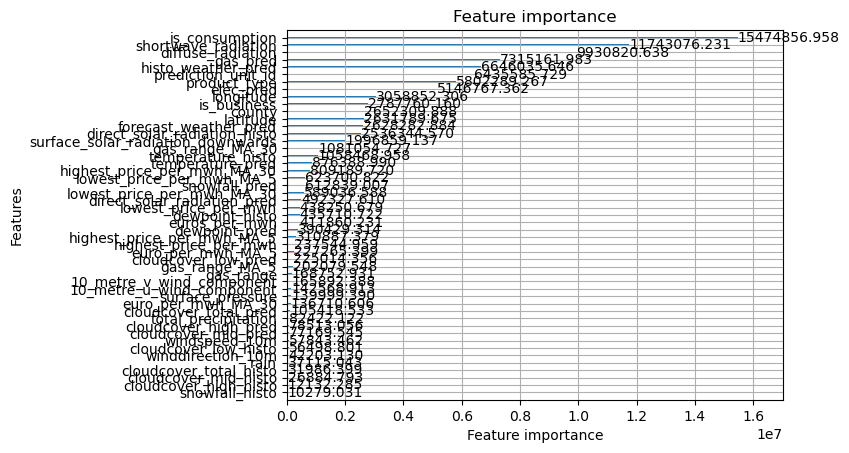

In [27]:
lgbm_model.fit(train_X, train_Y)
lgbm.plot_importance(lgbm_model, importance_type="gain")

In [28]:
train_y_pred = lgbm_model.predict(train_X)
train_mae = mean_absolute_error(train_Y, train_y_pred)
print("train_mae: ", train_mae)

train_mae:  45.439692604356544


In [29]:
test_y_pred = lgbm_model.predict(test_X)
test_mae = mean_absolute_error(test_Y, test_y_pred)
print("test_mae: ", test_mae)

test_mae:  104.8236692225435
